# TUGAS UTS

Lakukan analisa terhadap data pada https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi
- metode KNN
- metode pohon keputusan (Desision tree)
Proses ...

# Metode KNN

In [1]:
import pandas as pd
# link data 
dataset_url = 'https://raw.githubusercontent.com/nuskhatulhaqqi/data_mining/main/dataR2.csv'

# membaca data link
df = pd.read_csv(dataset_url)

#menampilkan data
df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [2]:
df.shape

(116, 10)

In [3]:
#membuat datafreme menjadi data pelatihan dengan menghapus data target yaitu Classification
X = df.drop(columns=["Classification"])
#cek apakah data sudah terhapus
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [5]:
#variabel y digunakan untuk menyimpan data target
y = df["Classification"].values
#melihat value data dengan jumlah 30
y[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
# mengambil dari sklearn.model_selection lalu import train_test_split
from sklearn.model_selection import train_test_split
#membagi data dengan ukuran 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# membuat KNN classifier dengan k = 2
knn = KNeighborsClassifier(n_neighbors = 2)
# klasifikasi data dengan fit
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [8]:
#melihat 30 data pertama 
knn.predict(X_test)[0:30]

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2])

In [9]:
#cek score data untuk k = 2
knn.score(X_test, y_test)

0.5416666666666666

In [10]:
from pandas.core.missing import mask_missing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# membuat loopingan untuk mengecek score data dari data 1 sampai 30
data = [] #menyimpan hasil score
data1 = [] #menyimpan data yang memiliki score terbesar
for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  data.append(knn.score(X_test, y_test))

maksimum = np.max(data)

for i in range (len(data)):

  if data[i] == maksimum:
    data1.append(i)
print ("hasil data dari 30 data :", data)
print ('nilai maksimim yang di dapatkan : ',maksimum)
print ("data yang memiliki hasil maksimum",data1)

hasil data dari 30 data : [0.5416666666666666, 0.5416666666666666, 0.3333333333333333, 0.3333333333333333, 0.4166666666666667, 0.3333333333333333, 0.375, 0.4166666666666667, 0.4166666666666667, 0.5, 0.4583333333333333, 0.5, 0.4583333333333333, 0.5, 0.5, 0.4583333333333333, 0.4583333333333333, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.375, 0.4583333333333333, 0.375, 0.4166666666666667]
nilai maksimim yang di dapatkan :  0.5416666666666666
data yang memiliki hasil maksimum [0, 1]


# Metode Pohon Keputusan (Desision tree)

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url = 'https://raw.githubusercontent.com/nuskhatulhaqqi/data_mining/main/dataR2.csv'

data2 = pd.read_csv(url)

data2

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [16]:
x = data2.iloc[:,0:9]
y = data2.iloc[:,9]

x

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)
x_train

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
67,64,22.222222,98,5.700,1.377880,12.1905,4.783985,13.91245,395.976
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239
82,48,32.461911,99,28.677,7.002923,46.0760,21.570000,10.15726,738.034
...,...,...,...,...,...,...,...,...,...
28,35,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928
64,59,22.832879,98,6.862,1.658774,14.9037,4.230105,8.20490,355.310
15,44,20.760000,86,7.553,1.600000,14.0900,20.320000,7.64000,63.610
100,74,28.650138,88,3.012,0.653805,31.1233,7.652220,18.35574,572.401


In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

hasil_prediksi = model.predict(x_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(hasil_prediksi,y_test))

0.5142857142857142


In [19]:
data2

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [21]:
y = data2["Classification"]
X = data2.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

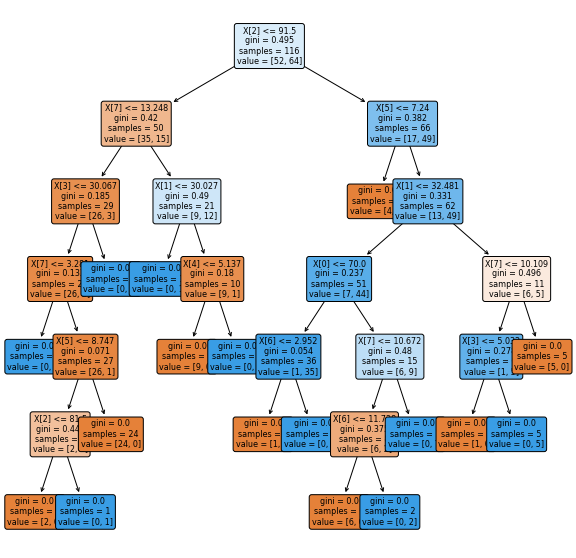

In [22]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()